***Откройте файл с данными и изучите общую информацию***

In [1]:
#импортируем библиотеки
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as gr
import math as mth
from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/logs_exp.csv', sep='\t')

In [3]:
df

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [5]:
df.describe()

,DeviceIDHash,EventTimestamp,ExpId
count,2.441260e+05,2.441260e+05,244126.000000
mean,4.627568e+18,1.564914e+09,247.022296
std,2.642425e+18,1.771343e+05,0.824434
min,6.888747e+15,1.564030e+09,246.000000
25%,2.372212e+18,1.564757e+09,246.000000
50%,4.623192e+18,1.564919e+09,247.000000
75%,6.932517e+18,1.565075e+09,248.000000
max,9.222603e+18,1.565213e+09,248.000000


В данных пропусков нет

***Подготовка данных***

In [6]:
#переименуем стоблцы
df.columns=['event', 'user', 'timestamp', 'group']
df.head()

,event,user,timestamp,group
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [7]:
#меняем название групп на более читабельные - А1 и А2 (контрольные группы)  и В экспериментальную
def group_name(gr):
    if gr==246:
        return 'A1'
    elif gr==247:
        return 'A2'
    elif gr==248:
        return 'B'
    else:
        return 'mistake'

df['group'] = df['group'].apply(group_name)
df

,event,user,timestamp,group
0,MainScreenAppear,4575588528974610257,1564029816,A1
1,MainScreenAppear,7416695313311560658,1564053102,A1
2,PaymentScreenSuccessful,3518123091307005509,1564054127,B
3,CartScreenAppear,3518123091307005509,1564054127,B
4,PaymentScreenSuccessful,6217807653094995999,1564055322,B
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,A2
244122,MainScreenAppear,5849806612437486590,1565212439,A1
244123,MainScreenAppear,5746969938801999050,1565212483,A1
244124,MainScreenAppear,5746969938801999050,1565212498,A1


In [8]:
#меняем тип данных
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df['user'] = df['user'].astype(str)
df['group'] = df['group'].astype(str)

In [9]:
#проверка дубликатов
df.duplicated().sum()

413

In [10]:
#удаляем дубликаты
df = df.drop_duplicates()

In [11]:
#добавляем столбец даты и времени
df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')
df

/tmp/ipykernel_391/1163230718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')


,event,user,timestamp,group,datetime
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,A1,2019-07-25 04:43:36
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,A1,2019-07-25 11:11:42
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,B,2019-07-25 11:28:47
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,B,2019-07-25 11:28:47
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,B,2019-07-25 11:48:42
...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,A2,2019-08-07 21:12:25
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,A1,2019-08-07 21:13:59
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,A1,2019-08-07 21:14:43
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,A1,2019-08-07 21:14:58


In [12]:
#добавляем столбец с датой
df['date'] = df['datetime'].dt.date
df

/tmp/ipykernel_391/367095172.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['datetime'].dt.date


,event,user,timestamp,group,datetime,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,A1,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,A1,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,B,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,B,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,B,2019-07-25 11:48:42,2019-07-25
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,A2,2019-08-07 21:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,A1,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,A1,2019-08-07 21:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,A1,2019-08-07 21:14:58,2019-08-07


Проверим данные на отсутствие пересечения пользователей. Применим метод intersect1d для поиска пересечений массивов

In [13]:
both_a1_a2 = np.intersect1d(df.query('group == "A1"')['user'].unique(), df.query('group == "A2"')['user'].unique())

In [14]:
both_a1_b = np.intersect1d(df.query('group == "A1"')['user'].unique(), df.query('group == "B"')['user'].unique())

In [15]:
both_a2_b = np.intersect1d(df.query('group == "A2"')['user'].unique(), df.query('group == "B"')['user'].unique())

In [16]:
df_filtered = df[~df['user'].isin([both_a1_a2, both_a1_b, both_a2_b])]
df_filtered

,event,user,timestamp,group,datetime,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,A1,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,A1,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,B,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,B,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,B,2019-07-25 11:48:42,2019-07-25
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,A2,2019-08-07 21:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,A1,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,A1,2019-08-07 21:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,A1,2019-08-07 21:14:58,2019-08-07


Пересечений пользователей не обнаружено

***Изучение и проверка данных***

**Сколько всего событий в логе?**

In [17]:
df['event'].count()

243713

In [18]:
df['event'].value_counts()

MainScreenAppear           119101
OffersScreenAppear          46808
CartScreenAppear            42668
PaymentScreenSuccessful     34118
Tutorial                     1018
Name: event, dtype: int64

**Сколько всего пользователей в логе?**

In [19]:
users = df['user'].nunique()
users

7551

**Сколько в среднем событий приходится на пользователя?**

In [20]:
events_per_users = ((df['event'].count()) / (users))
events_per_users.round(1)

32.3

**Данными за какой период вы располагаете? Данными за какой период времени вы располагаете на самом деле?**

In [21]:
#минимальная дата
df['datetime'].min()

Timestamp('2019-07-25 04:43:36')

In [22]:
#максимальная дата
df['datetime'].max()

Timestamp('2019-08-07 21:15:17')

In [23]:
#период данных
df['datetime'].max() - df['datetime'].min()

Timedelta('13 days 16:31:41')

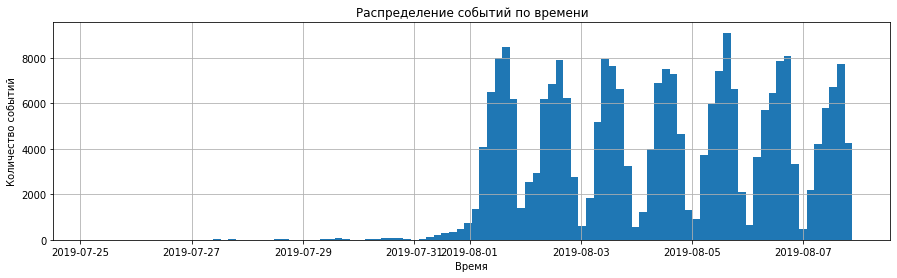

In [24]:
plt.figure(figsize=(15,4))
plt.hist(df['datetime'], bins=100) 
plt.xlabel('Время')
plt.grid()
plt.ylabel('Количество событий')
plt.title('Распределение событий по времени');

По гистограмме видим что в июле событий практически нет, а в августе их много и они цикличны. Скорее всего, данные для анализа наиболее полные в августе. Данные за июль отбросим как неполные 

In [25]:
#делаем срез по данным
df = df.loc[df['datetime'] >= '2019-08-01 00:00:00'].reset_index(drop=True)
df.sort_values(by='datetime')

,event,user,timestamp,group,datetime,date
0,Tutorial,3737462046622621720,2019-08-01 00:07:28,A1,2019-08-01 00:07:28,2019-08-01
1,MainScreenAppear,3737462046622621720,2019-08-01 00:08:00,A1,2019-08-01 00:08:00,2019-08-01
2,MainScreenAppear,3737462046622621720,2019-08-01 00:08:55,A1,2019-08-01 00:08:55,2019-08-01
3,OffersScreenAppear,3737462046622621720,2019-08-01 00:08:58,A1,2019-08-01 00:08:58,2019-08-01
4,MainScreenAppear,1433840883824088890,2019-08-01 00:08:59,A2,2019-08-01 00:08:59,2019-08-01
...,...,...,...,...,...,...
240882,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,A2,2019-08-07 21:12:25,2019-08-07
240883,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,A1,2019-08-07 21:13:59,2019-08-07
240884,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,A1,2019-08-07 21:14:43,2019-08-07
240885,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,A1,2019-08-07 21:14:58,2019-08-07


**Много ли событий и пользователей вы потеряли, отбросив старые данные?**

In [26]:
#новые события
new_events = df['event'].count()
new_events

240887

In [27]:
#разница в количестве событий, до среза было 243713 событий
243713 - new_events

2826

In [28]:
#новые пользователи
new_users = df['user'].nunique()
new_users

7534

In [29]:
#разница пользователей
users - new_users

17

Вывод: отбросив данные всего потеряли 2826 событий и 17 юзеров, что является небольшой долей

**Проверьте, что у вас есть пользователи из всех трёх экспериментальных групп**

In [30]:
df['group'].value_counts()

B     84563
A1    79302
A2    77022
Name: group, dtype: int64

In [31]:
df.groupby('group')['user'].nunique()

group
A1    2484
A2    2513
B     2537
Name: user, dtype: int64

Пользователи есть из всех трех экспериментальных групп

***Изучение воронки событий***

**Посмотрите, какие события есть в логах, как часто они встречаются. Отсортируйте события по частоте**

In [32]:
df['event'].value_counts()

MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: event, dtype: int64

**Посчитайте, сколько пользователей совершали каждое из этих событий. Отсортируйте события по числу пользователей. Посчитайте долю пользователей, которые хоть раз совершали событие**

In [33]:
events_users = df.groupby('event').agg({'event':'count', 'user':'nunique'}).sort_values(by='user', ascending=False)
events_users.columns = ['number_of_events', 'users']
events_users = events_users.reset_index()
events_users

,event,number_of_events,users
0,MainScreenAppear,117328,7419
1,OffersScreenAppear,46333,4593
2,CartScreenAppear,42303,3734
3,PaymentScreenSuccessful,33918,3539
4,Tutorial,1005,840


In [34]:
#доля пользователей, которые хоть раз совершали событие
events_users['share_of_users1'] = (events_users['users'] / new_users * 100).round(2) # доля хотя бы раз совершивших событие
events_users

,event,number_of_events,users,share_of_users1
0,MainScreenAppear,117328,7419,98.47
1,OffersScreenAppear,46333,4593,60.96
2,CartScreenAppear,42303,3734,49.56
3,PaymentScreenSuccessful,33918,3539,46.97
4,Tutorial,1005,840,11.15


**Предположите, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки**

In [35]:
df['event'].value_counts()

MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: event, dtype: int64

Названия столбцов
1. MainScreenAppear - Появление главного экрана
2. OffersScreenAppear - Появление экрана предложений
3. CartScreenAppear - Появление экрана корзины
4. PaymentScreenSuccessful - Экран платеж успешен
5. Tutorial - Руководство пользователя

Предположение: исходя из названий столбцов и последовательного уменьшения количеств событий, можно предположить что первые 4 события - типичная воронка действий пользователя (зашел на главный экран - выбрал предложение - добавил в корзину - оплатил)
Лишнее здесь только руководство пользователя, оно не является в данном случае нужным событием для исследования поведения пользователя

**По воронке событий посчитайте, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитайте отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B**

In [36]:
#считаем конверсию относительно каждого предыдущего этапа
events_users['conversion'] = 0
for i in range(0, len(events_users['share_of_users1'])):
    if i == 0:
        events_users['conversion'].iloc[i] = 100
    else:
        events_users['conversion'].iloc[i] = round(int(events_users['number_of_events'].iloc[i]) / int(events_users['number_of_events'].iloc[i-1]), 2)*100
display(events_users)

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,event,number_of_events,users,share_of_users1,conversion
0,MainScreenAppear,117328,7419,98.47,100
1,OffersScreenAppear,46333,4593,60.96,39
2,CartScreenAppear,42303,3734,49.56,91
3,PaymentScreenSuccessful,33918,3539,46.97,80
4,Tutorial,1005,840,11.15,3


**На каком шаге теряете больше всего пользователей?**

Больше всего теряем пользователей на переходе с этапа MainScreenAppear на OffersScreenAppear, конверсия всего 39%. Что-то не так со окном предложений

**Какая доля пользователей доходит от первого события до оплаты?**

In [37]:
#исключаем tutorial
events_users= events_users[events_users['event']!='Tutorial']
events_users

,event,number_of_events,users,share_of_users1,conversion
0,MainScreenAppear,117328,7419,98.47,100
1,OffersScreenAppear,46333,4593,60.96,39
2,CartScreenAppear,42303,3734,49.56,91
3,PaymentScreenSuccessful,33918,3539,46.97,80


In [38]:
payment_conversion = (events_users['users'].iloc[3]/events_users['users'].iloc[0]*100)
payment_conversion

47.70184661005526

***Изучите результаты эксперимента***

**Сколько пользователей в каждой экспериментальной группе?**

In [39]:
df.groupby('group')['user'].nunique()

group
A1    2484
A2    2513
B     2537
Name: user, dtype: int64

**Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверьте, находят ли статистические критерии разницу между выборками 246 и 247**

In [40]:
#создаем общий датафрейм с группами по пользователям
users_in_group = df.groupby('group')['user'].nunique()
users_in_group['A1+A2'] = users_in_group['A1'] + users_in_group['A2']
users_in_group

group
A1       2484
A2       2513
B        2537
A1+A2    4997
Name: user, dtype: int64

Группы распределены равномерно

**Выберите самое популярное событие**

In [41]:
#составим таблицу распределения событий по группам и с долями по событиям
#исключим событие Tutorial как ненужное
event_group_test = df[df['event']!='Tutorial'].pivot_table(
    index='event', 
    columns='group', 
    values='user',
    aggfunc='nunique').sort_values(by='A1', ascending=False)

event_group_test = event_group_test.reset_index()
event_group_test['A1+A2'] = event_group_test['A1'] + event_group_test['A2']
event_group_test['all'] = event_group_test['A1+A2'] + event_group_test['B']

event_group_test['part_A1'] = (event_group_test['A1'] / users_in_group['A1'] * 100).round(2)
event_group_test['part_A2'] = (event_group_test['A2'] / users_in_group['A2'] * 100).round(2)
event_group_test['part_B'] = (event_group_test['B'] / users_in_group['B'] * 100).round(2)
event_group_test['part_A1+A2'] = ((event_group_test['A1'] + event_group_test['A2']) / \
                                  (users_in_group['A1'] + users_in_group['A2']) * 100).round(2)

event_group_test

group,event,A1,A2,B,A1+A2,all,part_A1,part_A2,part_B,part_A1+A2
0,MainScreenAppear,2450,2476,2493,4926,7419,98.63,98.53,98.27,98.58
1,OffersScreenAppear,1542,1520,1531,3062,4593,62.08,60.49,60.35,61.28
2,CartScreenAppear,1266,1238,1230,2504,3734,50.97,49.26,48.48,50.11
3,PaymentScreenSuccessful,1200,1158,1181,2358,3539,48.31,46.08,46.55,47.19


Самое поулярное событие MainScreenAppear 

Для удобства создадим функцию для проведения тестов:

In [42]:
def ab_test(group1, group2, alpha):
    for i in event_group_test.index:
        p1 = event_group_test[group1][i] / users_in_group[group1]
        # пропорция успехов во второй группе:
        p2 = event_group_test[group2][i] / users_in_group[group2]
        # пропорция успехов в комбинированном датасете:
        p_combined = ((event_group_test[group1][i] + event_group_test[group2][i]) / 
                      (users_in_group[group1] + users_in_group[group2]))
        # разница пропорций в датасетах
        difference = p1 - p2
        # считаем статистику в отклонениях стандартного нормального распределения
        z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * 
                                        (1/users_in_group[group1] + 1/users_in_group[group2]))
        # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
        distr = st.norm(0, 1) 
        p_value = (1 - distr.cdf(abs(z_value))) * 2
        print('{} p-значение: {}'.format(event_group_test['event'][i], p_value))
        if (p_value < alpha):
            print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
        else:
            print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")
        print('')
        
ab_test("A1", "A2", 0.01)

MainScreenAppear p-значение: 0.7570597232046099
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

OffersScreenAppear p-значение: 0.2480954578522181
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

CartScreenAppear p-значение: 0.22883372237997213
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

PaymentScreenSuccessful p-значение: 0.11456679313141849
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



Выберем уровень статистической значимости в 1%

In [43]:
#A1/B тест
ab_test("A1", "B", 0.01)

MainScreenAppear p-значение: 0.2949721933554552
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

OffersScreenAppear p-значение: 0.20836205402738917
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

CartScreenAppear p-значение: 0.07842923237520116
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

PaymentScreenSuccessful p-значение: 0.2122553275697796
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



In [44]:
#A2/B тест
ab_test("A2", "B", 0.01)

MainScreenAppear p-значение: 0.4587053616621515
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

OffersScreenAppear p-значение: 0.9197817830592261
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

CartScreenAppear p-значение: 0.5786197879539783
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

PaymentScreenSuccessful p-значение: 0.7373415053803964
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



In [45]:
#A1+A2/B тест
ab_test("A1+A2", "B", 0.01)

MainScreenAppear p-значение: 0.29424526837179577
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

OffersScreenAppear p-значение: 0.43425549655188256
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

CartScreenAppear p-значение: 0.18175875284404386
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

PaymentScreenSuccessful p-значение: 0.6004294282308704
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



<div class="alert alert-info"> A1/А2 тест - 4 проверки
A1/B тест - 4 проверки
A2/B тест - 4 проверки
A1+A2/B тест - 4 проверки
Во всех проверках результат "Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными" Значит можно повысить уровень статистической значимости до 5% </div>

In [46]:
#A1/B тест
ab_test("A1", "B", 0.05)

MainScreenAppear p-значение: 0.2949721933554552
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

OffersScreenAppear p-значение: 0.20836205402738917
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

CartScreenAppear p-значение: 0.07842923237520116
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

PaymentScreenSuccessful p-значение: 0.2122553275697796
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



In [47]:
#A2/B тест
ab_test("A2", "B", 0.05)

MainScreenAppear p-значение: 0.4587053616621515
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

OffersScreenAppear p-значение: 0.9197817830592261
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

CartScreenAppear p-значение: 0.5786197879539783
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

PaymentScreenSuccessful p-значение: 0.7373415053803964
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



In [48]:
#A1+A2/B тест
ab_test("A1+A2", "B", 0.05)

MainScreenAppear p-значение: 0.29424526837179577
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

OffersScreenAppear p-значение: 0.43425549655188256
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

CartScreenAppear p-значение: 0.18175875284404386
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

PaymentScreenSuccessful p-значение: 0.6004294282308704
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



Достаточно применить уровень статистической значимости в 5%

<div class="alert alert-info"> Скорректируем уровень альфа с учетом проведенных проверок
Возьмем уровень альфа в 0,05 (5%). Мы проводим 4 сравнения. Применим поправку методом Шидака, чтобы не снидать мощность теста. альфа = 1 - (1 - 0.05)^(1/4) = 0.0127  Итого расчет с учетом поправки:</div>

In [49]:
#A1/B тест
ab_test("A1", "B", 0.0127)

MainScreenAppear p-значение: 0.2949721933554552
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

OffersScreenAppear p-значение: 0.20836205402738917
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

CartScreenAppear p-значение: 0.07842923237520116
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

PaymentScreenSuccessful p-значение: 0.2122553275697796
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



In [50]:
#A2/B тест
ab_test("A2", "B", 0.0127)

MainScreenAppear p-значение: 0.4587053616621515
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

OffersScreenAppear p-значение: 0.9197817830592261
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

CartScreenAppear p-значение: 0.5786197879539783
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

PaymentScreenSuccessful p-значение: 0.7373415053803964
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



In [51]:
#A1+A2/B тест
ab_test("A1+A2", "B", 0.0127)

MainScreenAppear p-значение: 0.29424526837179577
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

OffersScreenAppear p-значение: 0.43425549655188256
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

CartScreenAppear p-значение: 0.18175875284404386
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

PaymentScreenSuccessful p-значение: 0.6004294282308704
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



In [52]:
#A1/A2 тест
ab_test("A1", "A2", 0.0127)

MainScreenAppear p-значение: 0.7570597232046099
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

OffersScreenAppear p-значение: 0.2480954578522181
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

CartScreenAppear p-значение: 0.22883372237997213
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

PaymentScreenSuccessful p-значение: 0.11456679313141849
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



Вывод: В результате A/A/B эксперемента значимой разницы между группами не выявлено. Тестирование успешно - изменение шрифта не повлияло на поведение пользователей